# 이벤트 처리

- 키보드 이벤트 

In [3]:
import cv2
import numpy as np

In [4]:
img = cv2.imread('./data/lena.jpg')

cv2.imshow('img', img)
while True : 
    keycode = cv2.waitKey()
    print(keycode)
    if keycode == ord('i') :
        img= 255 - img
        cv2.imshow('img' , img) 

    elif keycode == ord('q'):
        break
cv2.destroyAllWindows()

113


- 마우스 이벤트 

In [5]:
# 마우스 이벤트를 처리할 루틴( 입력값들은 거의 고정임) 
def on_mouse(event, x, y, flags, param) :
    global old_x , old_y
    if event == cv2.EVENT_LBUTTONDOWN:
        old_x, old_y = x, y 
        
    elif event == cv2.EVENT_LBUTTONUP:
        pass
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON :
            cv2.line(img, (old_x, old_y), (x,y), (0,0,255), 3) 
            cv2.imshow('img', img)
            old_x, old_y= x, y

img = cv2.imread('./data/lena.jpg')

cv2.imshow('img', img)

# 마우스 이벤트가 발생했을때 처리할 루틴(함수)  등록
# cv2.setMouseCallback('도화지' , '루틴')
cv2.setMouseCallback('img', on_mouse)


# 출력
cv2.waitKey()
cv2.destroyAllWindows()

- 트랙바 이벤트 

In [6]:
def on_level_change(pos) : 
    # 이벤트가 발생할때 마다 화면 밝기가 바뀌도록 구현
    # pos : 바 가 움직였을때의 위치
    img[:] = pos
    cv2.imshow('img' ,img) 

np.full((512,512,3) ,0,np.uint8) 
cv2.imshow('img', img) 


# ㅌ랙바 이벤트가 발생했을때 처리할 루팅(함수) 등록
# cv2.createTrackbar(트랙바이름, 윈도우, 트랙바의 범위, 이벤트 발생시 처리할 함수 )
cv2.createTrackbar('level','img', 0, 255, on_level_change) 

# 트랙바 시작 값 수정
cv2.setTrackbarPos('level','img', 128)

# 출력

cv2.waitKey()
cv2.destroyAllWindows()

* 실습 RGB 트랙바 세개 만들기
-
- 해당 트랙바의 pos 파라미터를 얻어옴 
- cv2.getTrackbarpos(트랙바 이름 , 윈도우 )

In [23]:
def on_level_change(pos) :  
    R_pos = cv2.getTrackbarPos('R', 'img')
    G_pos = cv2.getTrackbarPos('G', 'img')
    B_pos = cv2.getTrackbarPos('B', 'img')

    img[:] = (B_pos, G_pos,R_pos )
    cv2.imshow('img' ,img)

# img 설정
img =np.full((512,512,3) ,0,np.uint8) 

# 이미지 출력
cv2.imshow('img', img)

# RGB 트랙바 생성
cv2.createTrackbar('R','img', 0, 255, on_level_change)
cv2.createTrackbar('G','img', 0, 255, on_level_change)
cv2.createTrackbar('B','img', 0, 255, on_level_change)

# B 트랙바 시작값 설정
cv2.setTrackbarPos('B', 'img', 255) 

# 종료 
cv2.waitKey()
cv2.destroyAllWindows()

# 유용한 기능들
- 마스크 연산

In [8]:
lena= cv2.imread('./data/lenna.bmp')
mask = cv2.imread('./data/mask_smile.bmp', cv2.IMREAD_GRAYSCALE) 

# mask 이미지에서 흰 부분(mask >0) 의 위치만 레나영상에 노란색으로 바꾸기 
lena[mask > 0] = (0,255,255) 

cv2.imshow("lena", lena) 
cv2.imshow("mask", mask) 

cv2.waitKey()
cv2.destroyAllWindows()

- 실습

In [9]:
src = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('./data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)

dst[mask>0] = src[mask >0]

# 출력
cv2.imshow("src", src)
cv2.imshow("mask", mask)
cv2.imshow("dst", dst)

# 종료
cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 밝기 조절

In [10]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

**영상의 밝기를 +100만큼 조절**

In [13]:
# 이렇게 하면 거뭇한 부분이 나옴
# 오버플로우로 255를 넘어간 나머지값이 출력됨

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE) 

dst = src.copy() 
dst =src + 100 

cv2.imshow('src', src) 
cv2.imshow('dst', dst) 

cv2.waitKey()
cv2.destroyAllWindows()


In [32]:
# 위의 방법을 수정 

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE) 
# 데이터 타입이 이미 uint8 이여서 int32로 바꿔줌
# 음수와 255보다 큰수를 표현할수있게 

src = np.array(src, dtype =np.int32) 


dst = src.copy() 

# 밝기 조정
dst =src - 50

# dst의 상한선, 하한선 지정
dst = np.clip(dst, 0, 255) 

# 데이터 타입 복구 
src = np.array(src, dtype=np.uint8)
dst = np.array(dst, dtype=np.uint8) 

#출력
cv2.imshow('src', src) 
cv2.imshow('dst', dst) 

cv2.waitKey()
cv2.destroyAllWindows()


In [18]:
# 다른 쉬운 방법 
#cv2.add 
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE) 

dst= cv2.add(src, 100) 

#출력
cv2.imshow('src', src) 
cv2.imshow('dst', dst) 

cv2.waitKey()
cv2.destroyAllWindows()


**TrackBar를 이용해서 레나영상의 밝기를 조절**

In [24]:
dst = cv2.add(src, 100) 

def update(pos) :
    dst = cv2.add(src, pos) 
    cv2.imshow('dst', dst) 

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE) 
dst= src.copy()
cv2.imshow('dst',dst) 

cv2.createTrackbar('brightness', 'dst', 0, 100, update) 

cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 명암비 조절

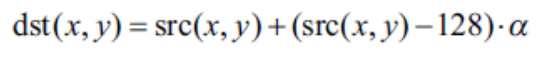

In [27]:
from IPython.display import Image
Image('./images/image1.png')

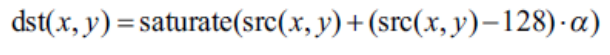

In [28]:
Image('./images/image2.png')

In [34]:
src =cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

# 알파는 명암비의 강도 조절하는 역할 
alpha = 1.0

# src의 type이 uint8(0~255) 여서 바로 128.0 으로 자료형을 바꿔줌
dst = src+ (src-128.0)* alpha 

# 상한가 하한가 설정
dst = np.clip(dst, 0, 255) 
dst = dst.astype('uint8') 

# 출력 종료 
cv2.imshow('src' ,src) 
cv2.imshow('dst', dst) 
cv2.waitKey()
cv2.destroyAllWindows()

# 히스토그램 분석
* 각각의 밝기에 해당하는 픽셀 개수를 세어서 막대그래프 형태로 표현

## cv2.calcHist() 함수
- cv2.calcHist(images=[이미지] , channels =[채널] , mask = [마스크], histSize=[] ,ranges=[])

In [35]:
src = np.array([[0, 0, 0, 0],
                [1, 2, 3, 5],
                [6, 1, 2, 3],
                [4, 3, 1, 7]], dtype=np.uint8) # 4*4, 1 channel 영상

hist1 = cv2.calcHist(images=[src] , channels = [0], mask=None, histSize=[8], ranges=[0,8])

array([[4.],
       [3.],
       [2.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [37]:
hist2 = cv2.calcHist(images=[src] , channels = [0], mask=None, histSize=[4], ranges=[0,8])
hist2

array([[7.],
       [5.],
       [2.],
       [2.]], dtype=float32)

## 히스토그램 구하기 (lena)

**그레이 스케일 영상**

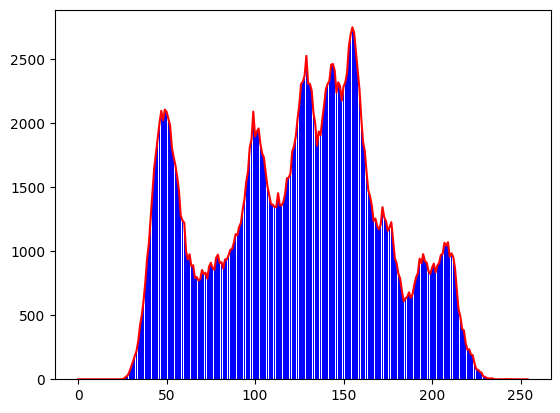

In [45]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist(images=[src] , channels = [0], mask=None, histSize=[255], ranges=[0,255])

plt.plot(hist, color = 'r')
plt.bar(np.arange(255), hist.flatten(), color = 'b');

**컬러 영상(채널별 히스토그램)**

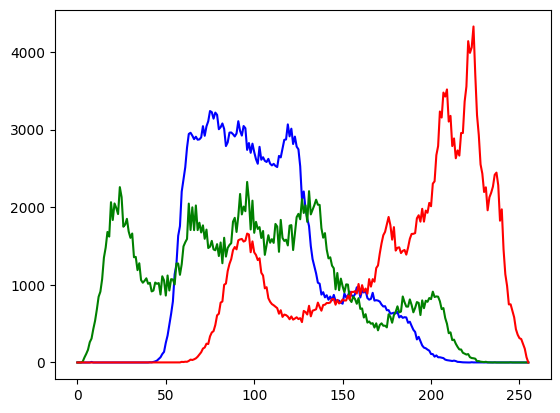

In [46]:
src = cv2.imread('./data/lenna.bmp')

colors = ['b', 'g' ,'r']

for i in range(3) : 
    hist = cv2.calcHist(images=[src] , channels = [i], mask=None, histSize=[256], ranges=[0,255])
    plt.plot(hist, color = colors[i])

## 히스토그램 스트레칭

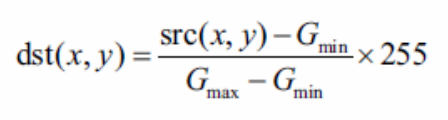

In [47]:
# 정규화 
from IPython.display import Image
Image('./images/image3.png')

In [60]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE) 

# 정규화
dst = (src- src.min())/ (src.max()-src.min()) * 255

# 자료형 바꿔줌 
dst =np.array(dst, dtype=np.uint8) 

cv2.imshow('dst',dst) 

cv2.imshow('src', src) 
cv2.waitKey()
cv2.destroyAllWindows()

**히스토그램으로 src, dst의 명암비 확인**

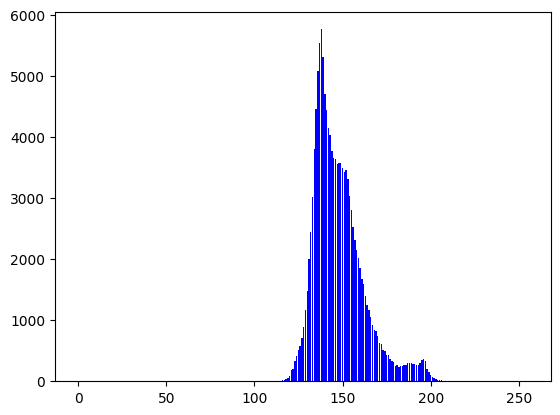

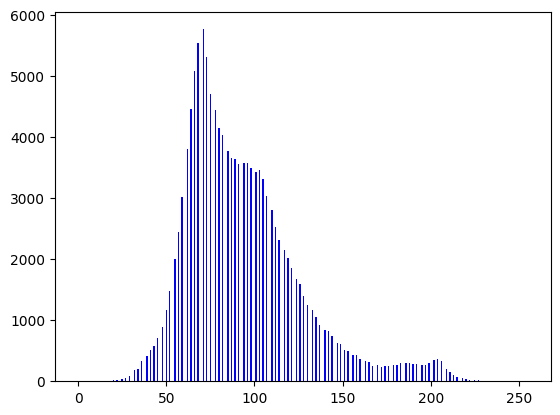

In [61]:
# 스트레칭 전
src_hist = cv2.calcHist(images=[src] , channels = [0], mask=None, histSize=[256], ranges=[0,255])
plt.bar(np.arange(256) ,src_hist.flatten() , color ='b')
plt.show()


# 스트레칭 후
dst_hist = cv2.calcHist(images=[dst] , channels = [0], mask=None, histSize=[256], ranges=[0,255])
plt.bar(np.arange(256) ,dst_hist.flatten() , color ='b')
plt.show()

# 히스토그램 평활화 (Equalization) 

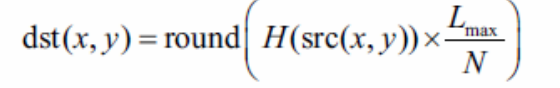

In [64]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

cv2.imshow("src", src)

cv2.imshow("dst", dst)

# 종료 
cv2.waitKey()
cv2.destroyAllWindows() 

**히스토그램으로 src, dst의 명암비 확인**

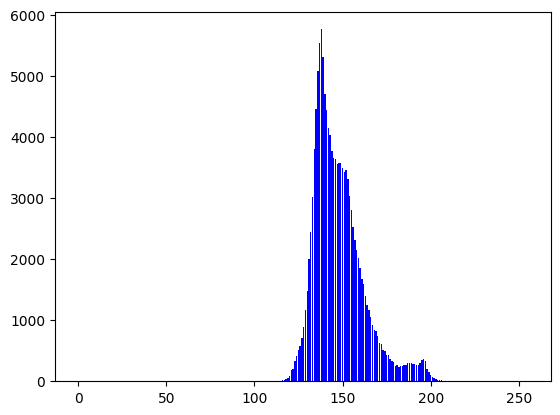

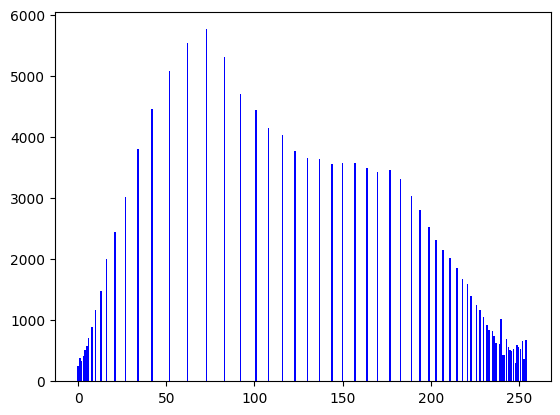

In [65]:
# 스트레칭 전
src_hist = cv2.calcHist(images=[src] , channels = [0], mask=None, histSize=[256], ranges=[0,255])
plt.bar(np.arange(256) ,src_hist.flatten() , color ='b')
plt.show()


# 스트레칭 후
dst_hist = cv2.calcHist(images=[dst] , channels = [0], mask=None, histSize=[256], ranges=[0,255])
plt.bar(np.arange(256) ,dst_hist.flatten() , color ='b')
plt.show()

## 히스토그램 평활화 (Color Image)

** 잘못된 예시**
- 컬러 영상에서는 각 채널별로 평활화를 하고 병합하면 고유한 색조합이 깨진다

In [70]:
# 이건 잘못된 예시 

src = cv2.imread('./data/pepper.bmp')

# 채널 분리
# b, g,r = cv2.split(src) 
b =src[:,:,0]
g= src[:,:,1]
r= src[:,:,2]


dst_b = cv2.equalizeHist(b)
dst_g = cv2.equalizeHist(g)
dst_r = cv2.equalizeHist(r)

dst =src.copy()

# 채널 병합
dst[:,:,0] =dst_b
dst[:,:,1] =dst_g
dst[:,:,2] =dst_r


# 출력 
cv2.imshow('src', src) 
cv2.imshow('dst', dst) 

# 종료 
cv2.waitKey()
cv2.destroyAllWindows()

** 좋은 예시 ** 
- 명암비를 조절한다는 것은 '밝기'값만 관계가 있으므로 
- 컬러공간을 BGR 에서 yCrCb( y: 밝기 , Cr, Cb:색상)로 바꾼다음 
- y(밝기) 채널에 대해서만 히스토그램 평활화를 실행하고
- 합치면 색상 정보는 그대로 유지 됨

In [72]:
# 잘된예시 
src = cv2.imread('./data/pepper.bmp')

# BGR to YCrCb 변형
src_yCrCb= cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# 채널분리 
y, Cr, Cb = cv2.split(src_yCrCb)

# y만 평활화 
y_equlized= cv2.equalizeHist(y)

# 채널 병합( 아직 yCrCb 색상공간)
dst_yCrCb = cv2.merge([y_equlized, Cr, Cb]) 

# 다시 BGR로 변형
dst = cv2.cvtColor(dst_yCrCb, cv2.COLOR_YCrCb2BGR)

# 출력 
cv2.imshow('src', src) 
cv2.imshow('dst', dst) 

# 종료 
cv2.waitKey()
cv2.destroyAllWindows()